In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean

train = pd.read_csv('/content/sales_train.csv')
test = pd.read_csv('/content/test.csv')
shops = pd.read_csv('/content/shops.csv')
items = pd.read_csv('/content/items.csv')
item_categories = pd.read_csv('/content/item_categories.csv')

#train['date'] = train['date'].astype('datetime64[ns]')
# train = train.set_index('date')
# train['year'] = train.index.year
# train['month'] = train.index.month
# train['day'] = train.index.day
# train['weekday name'] = train.index.weekday

FileNotFoundError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error

**Average Method**

In [ ]:
new = train.groupby(by=['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum()

In [ ]:
q1 = train.groupby(by=['shop_id', 'item_id'])['item_cnt_day'].sum()
q1 = q1.to_frame()
q1 = q1.reset_index()
q1['key'] = 1
q2 = pd.DataFrame(range(34))
q2.columns = ['date_block_num']
q2['key'] = 1
q1 = q1.merge(q2, how='outer', on='key').drop('key', 1)
q1['item_cnt_day'] = 0
q1.head()
new1 = q1.groupby(by=['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum()

In [ ]:
all_dates = new.add(new1, fill_value=0)

In [ ]:
rolling_predict_dates = all_dates.rolling(window=12).mean()

In [ ]:
rolling_frame = rolling_predict_dates.to_frame()
rolling_frame = rolling_frame.reset_index()
all_dates = all_dates.to_frame().reset_index()
errors = []
for i in range(11, 33):
  errors.append(mean_absolute_error(rolling_frame[rolling_frame['date_block_num'] == i]['item_cnt_day'], 
                                    all_dates[all_dates['date_block_num'] == i]['item_cnt_day']))

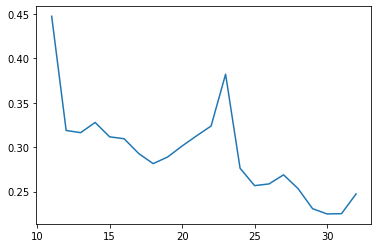

In [ ]:
plt.plot(range(11, 33), errors)

Error rate

In [ ]:
mean(errors)

0.30472048579620453

**Naive method**

In [ ]:
naive_errors =[]
for i in range(12, 34):
  naive_errors.append(mean_absolute_error(rolling_frame[rolling_frame['date_block_num'] == i - 1]['item_cnt_day'], 
                                    all_dates[all_dates['date_block_num'] == i]['item_cnt_day']))

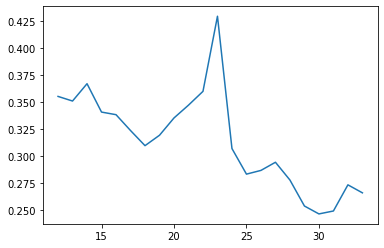

In [ ]:
plt.plot(range(12, 34), naive_errors)

Error rate

In [ ]:
mean(naive_errors)

0.31413191089341225